In [1]:
# Import dependencies
import requests
from PIL import Image

# Gathering URLs
The image data can be stored in many different ways, but unfortunately it isn't really feasible to store a bunch of images in a CSV. This means that the steps to import a bunch of images will depend wholly on the way those images are stored, and where the metadata about those images resides. In our case, the image metadata IS stored conveniently in a CSV! Lets import it.

In [2]:
import pandas as pd

path = "https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/csvs/files_list.csv"

filenames_df = pd.read_csv(path)
filenames_df.head()

,files
0,ch4f_straight_angry_sunglasses.png
1,tammo_straight_neutral_sunglasses.png
2,at33_straight_neutral_open.png
3,boland_up_angry_open.png
4,mitchell_straight_angry_sunglasses.png


Note that the metadata contains only one column; the filename of each image. We can combine this with the base_url to build full urls for each image.

In [3]:
# Build a list of images using a for loop

# Define the base_url
base_url = "https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/"

# Create an empty list for the urls
img_urls = []

# Loop through the DataFrame and build and append the full image urls
for i in range(len(filenames_df)):
    filename = filenames_df.iloc[i,0]
    img_urls.append(base_url + filename)

img_urls[0:5]

['https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/ch4f_straight_angry_sunglasses.png',
 'https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/tammo_straight_neutral_sunglasses.png',
 'https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/at33_straight_neutral_open.png',
 'https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/boland_up_angry_open.png',
 'https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/mitchell_straight_angry_sunglasses.png']

In [5]:
# Check the number of urls
len(img_urls)

624

Importing 624 images will take a while, likely more than 4 minutes. When we do the import, it will be important to add print statements to monitor progress, and also to check our work with only a few images to start.

0/5: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/ch4f_straight_angry_sunglasses.png
1/5: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/tammo_straight_neutral_sunglasses.png
2/5: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/at33_straight_neutral_open.png
3/5: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/boland_up_angry_open.png
4/5: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/mitchell_straight_angry_sunglasses.png


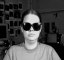

In [6]:
# Create and empty list for images
imgs = []

# Loop through ONLY THE FIRST FIVE image_urls to open and append each image
num_imgs = 5

for i in range(num_imgs):
    img_url = img_urls[i]
    # Print a statement to show progress
    print(f"{i}/{num_imgs}: Attempting to import {img_url}")

    # Use requests.get along with the stream parameter and raw attribute
    response = requests.get(img_url, stream=True).raw

    # Append each img to the imgs list
    imgs.append(Image.open(response))

# View the first image to confirm
imgs[0]


0/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/ch4f_straight_angry_sunglasses.png
1/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/tammo_straight_neutral_sunglasses.png
2/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/at33_straight_neutral_open.png
3/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/boland_up_angry_open.png
4/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/mitchell_straight_angry_sunglasses.png
5/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/kk49_straight_neutral_sunglasses.png
6/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/choon_left_sad_open.png
7/624: Attempting to import https://static.bc-edx.com/ai/ail-v-1-0/m19/

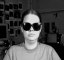

In [8]:
# After confirming the code works, copy it to this cell and import all images
# Create and empty list for images
imgs = []

# Loop through ALL image_urls to open and append each image
num_imgs = len(img_urls)

for i in range(num_imgs):
    img_url = img_urls[i]
    # Print a statement to show progress
    print(f"{i}/{num_imgs}: Attempting to import {img_url}")

    # Use requests.get along with the stream parameter and raw attribute
    response = requests.get(img_url, stream=True).raw

    # Append each img to the imgs list
    imgs.append(Image.open(response))

# View the first image to confirm
imgs[0]

# Storing Pickles
This process took a long time; it would be nice if we didn't have to RELOAD all the images every time we want to use them. The "pickle" module allows us to store Python objects as local files so that we can open them back up whenever we need them, even in other projects. In Google Colab, we'll also have to start by "mounting" Google Drive. Lets try this with the list of images we just made.

In [18]:
# Import the modules
from google.colab import drive
import pickle

drive.mount('/content/drive')

# Open a new file named 'img.pkl' with write permission
with open('/content/drive/My Drive/img.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(imgs, file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


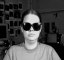

In [20]:
# Load the images from the pkl file
with open('/content/drive/My Drive/img.pkl', 'rb') as file:
    recalled_imgs = pickle.load(file)

recalled_imgs[0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


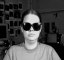

In [21]:
# You can use this code to open the pkl file in other colab notebooks
from google.colab import drive
import pickle
drive.mount('/content/drive')

with open('/content/drive/My Drive/img.pkl', 'rb') as file:
    imgs = pickle.load(file)

imgs[0]